In [155]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dask.dataframe as dd
import plotly.express as px
import time
import warnings
warnings.filterwarnings('ignore')


In [193]:
%%time

file_path="/content/globalterrorismdb_0718dist.csv"
df = pd.read_csv(file_path, encoding='iso-8859-1')

CPU times: user 1.77 s, sys: 272 ms, total: 2.04 s
Wall time: 2.05 s


In [194]:
%%time

ddf = dd.from_pandas(df, npartitions=2)

CPU times: user 1.18 s, sys: 87.9 ms, total: 1.27 s
Wall time: 1.32 s


In [158]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104130 entries, 0 to 104129
Columns: 135 entries, eventid to related
dtypes: float64(69), int64(8), object(58)
memory usage: 107.3+ MB


In [160]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [161]:
df.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    103763
               ...  
INT_LOG            1
INT_IDEO           1
INT_MISC           1
INT_ANY            1
related        92974
Length: 135, dtype: int64

In [162]:
df.shape

(104130, 135)

In [195]:
# I'm just take important data in whole dataset those I'm using further processing.
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

df=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
df['casualities']=df['Killed']+df['Wounded']
df.head(5)

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [164]:
df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [165]:
df['Motive'].unique()[:15]

array([nan, 'To protest the Cairo Illinois Police Deparment',
       'To protest the War in Vietnam and the draft',
       'Protest the draft and Vietnam War',
       'To protest United States owned businesses in Puerto Rico',
       'Suspected motives were to protest the Vietnam War and/or show support for the Black Panther Party and/or show support for the Young Lords.',
       'Retaliation for the store owner who shot and killed an African American attempting to commit a robbery at his store.',
       'The incident took place during disturbances between the Black Student Union and the university.',
       'The incident took place during heightened antiwar sentiments in Seattle Washington.',
       'Intimidate the Black Panther Party.',
       'The attack occurred during the violent Iowa Beef Packers strike in South Sioux City.',
       'The motive of the attack was to prevent the African American community of West Point Mississippi from organizing.',
       'To kill police',
       

In [166]:
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,casualities
count,104130.000000,104130.000000,104130.000000,100064.000000,1.000630e+05,97600.000000,94238.000000,93942.000000
mean,1993.756007,6.455930,15.312686,21.316598,-8.518639e+02,2.340574,3.273722,5.467597
std,10.956790,3.372717,8.813818,21.628764,2.724580e+05,11.558907,46.412762,53.806855
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1985.000000,4.000000,8.000000,7.209594,-7.152779e+01,0.000000,0.000000,0.000000
50%,1992.000000,6.000000,15.000000,27.512173,2.713564e+01,0.000000,0.000000,1.000000
75%,2005.000000,9.000000,23.000000,36.354145,6.662096e+01,1.000000,1.000000,3.000000
max,2011.000000,12.000000,31.000000,74.633553,1.793667e+02,1384.000000,8191.000000,9574.000000


In [167]:
df.duplicated().sum()


7278

In [168]:
df.drop_duplicates()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104125,2011,11,20,Iraq,Kirkuk,Middle East & North Africa,Kirkuk,35.452110,44.375465,Bombing/Explosion,0.0,2.0,Civilians in a vehicle in Kirkuk city,11/20/2011: A sticky bomb attached to a civili...,Unknown,Private Citizens & Property,Explosives,Unknown,2.0
104126,2011,11,20,Iraq,Kirkuk,Middle East & North Africa,Taza Khurmatu,35.303047,44.329933,Armed Assault,1.0,1.0,Members of the Kurdish Asaish security force i...,11/20/2011: Unidentified gunmen in a vehicle o...,Gunmen,Government (General),Firearms,Unknown,2.0
104127,2011,11,20,Pakistan,Balochistan,South Asia,Quetta,30.200819,66.994354,Facility/Infrastructure Attack,0.0,0.0,Three NATO tankers in the Dasht area deliverin...,11/20/2011: Unidentified gunmen opened fire on...,Taliban,Military,Firearms,"Specific motive is unknown; however, the tanke...",0.0
104128,2011,11,20,Pakistan,Sindh,South Asia,Karachi,24.891115,67.143311,Armed Assault,1.0,0.0,Head Constable Sanaullah Niazi of the CID,11/20/2011: Head Constable Sanaullah Niazi fro...,Gunmen,Police,Firearms,Unknown,1.0


In [169]:
sum(df['Country'].apply(lambda countr: 'Egypt' in countr))


505

In [170]:
df[df['Country']=='Egypt'].groupby('AttackType').count().sort_values('casualities',ascending=False).iloc[:10]['casualities']

AttackType
Armed Assault                     192
Assassination                     190
Bombing/Explosion                  69
Facility/Infrastructure Attack     36
Unknown                            10
Hijacking                           3
Hostage Taking (Kidnapping)         3
Unarmed Assault                     1
Name: casualities, dtype: int64

In [171]:
df[df['Country']=='Egypt'].groupby('city').count().sort_values('casualities',ascending=False).iloc[:10]['casualities']

city
Cairo         77
Mallawi       69
Asyut         43
Minya         24
Dayrut        24
Abu Qurqas    22
Alexandria    11
Qena          10
Badari         9
Nawai          8
Name: casualities, dtype: int64

In [172]:
df[df['Country']=='Egypt'].sort_values('Year',ascending=False).iloc[:10]

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
103902,2011,11,10,Egypt,North Sinai Governorate,Middle East & North Africa,al-Arish,31.126646,33.800865,Bombing/Explosion,0.0,0.0,"A gas pipeline near al-Arish, sending gas to I...",11/10/2011: A pipeline sending gas to Israel a...,Unknown,Utilities,Explosives,"Specific motive is unknown; however, this is t...",0.0
102382,2011,7,12,Egypt,Shamal Sina,Middle East & North Africa,El Arish,31.126646,33.800865,Bombing/Explosion,0.0,0.0,A natural gas pipeline,"07/12/2011: On Tuesday, near El Arish, Shamal ...",Unknown,Utilities,Explosives,The specific motive for the attack is unknown.,0.0
99702,2011,1,1,Egypt,Al Iskandariyah (Alexandria),Middle East & North Africa,Alexandria,30.762296,29.696268,Bombing/Explosion,23.0,97.0,Civilians,"01/01/2011: On Saturday at 0000 midnight, in t...",Army of Islam,Private Citizens & Property,Explosives,The specific motive for the attack is unknown.,120.0
100219,2011,2,7,Egypt,Shamal Sina,Middle East & North Africa,Rafah,31.250196,34.241280,Bombing/Explosion,0.0,1.0,A police security building was targeted in the...,"02/07/2011: On Monday morning, in the neighbor...",Takfir wal-Hijra (Excommunication and Exodus),Police,Explosives,The specific motive for the attack is unknown.,1.0
100992,2011,4,6,Egypt,Al Qahirah (Cairo),Middle East & North Africa,Cairo,30.084629,31.334314,Bombing/Explosion,0.0,3.0,The target was unknown.,"04/06/2011: On Wednesday, near Cairo, Al Qahir...",Unknown,Unknown,Explosives,The specific motive for the attack is unknown.,3.0
101329,2011,4,27,Egypt,Shamal Sina,Middle East & North Africa,El Arish,31.126646,33.800865,Bombing/Explosion,0.0,0.0,A gas pipeline was targeted in the attack.,"04/27/2011: On Wednesday morning, near El Aris...",Unknown,Utilities,Explosives,The specific motive for the attack is unknown.,0.0
102087,2011,6,21,Egypt,Shamal Sina,Middle East & North Africa,El Arish,31.126646,33.800865,Armed Assault,2.0,2.0,Policemen,"06/21/2011: On Tuesday, in El Arish, Shamal Si...",Unknown,Police,Firearms,The specific motive for the attack is unknown.,4.0
102273,2011,7,4,Egypt,Shamal Sina,Middle East & North Africa,NaN,30.608472,33.617577,Armed Assault,0.0,0.0,A gas pipeline was targeted in the attack.,"07/04/2011: On Monday morning, in the Bir al-A...",Unknown,Utilities,Explosives,The specific motive for the attack is unknown.,0.0
102003,2011,6,13,Egypt,Shamal Sina,Middle East & North Africa,El Arish,31.126646,33.800865,Hostage Taking (Kidnapping),0.0,0.0,A civilian,"06/13/2011: On Monday, in El Arish, Shamal Sin...",Unknown,Private Citizens & Property,Unknown,The specific motive for the attack is unknown.,0.0
102589,2011,7,30,Egypt,Shamal Sina,Middle East & North Africa,Sinai,30.608472,33.617577,Bombing/Explosion,0.0,0.0,A gas pipeline,"07/30/2011: On Saturday, in Sinai, Shamal Sina...",Unknown,Utilities,Explosives,The specific motive for the attack is unknown.,0.0


In [173]:
df[df['Country']=='Egypt'].groupby('Group').count().sort_values('casualities',ascending=False).iloc[:10]['casualities']

Group
Al-Gama'at al-Islamiyya (IG)                 257
Unknown                                      108
Muslim Militants                              60
Muslim Fundamentalists                        23
Islamist extremists                           11
Egyptian Islamic Jihad (Al-Jihad)              9
Abdullah Azzam Brigades                        4
Egypt's Revolution                             3
Forbid the Evil Group (Muslim Extremists)      3
Muslim extremists                              2
Name: casualities, dtype: int64

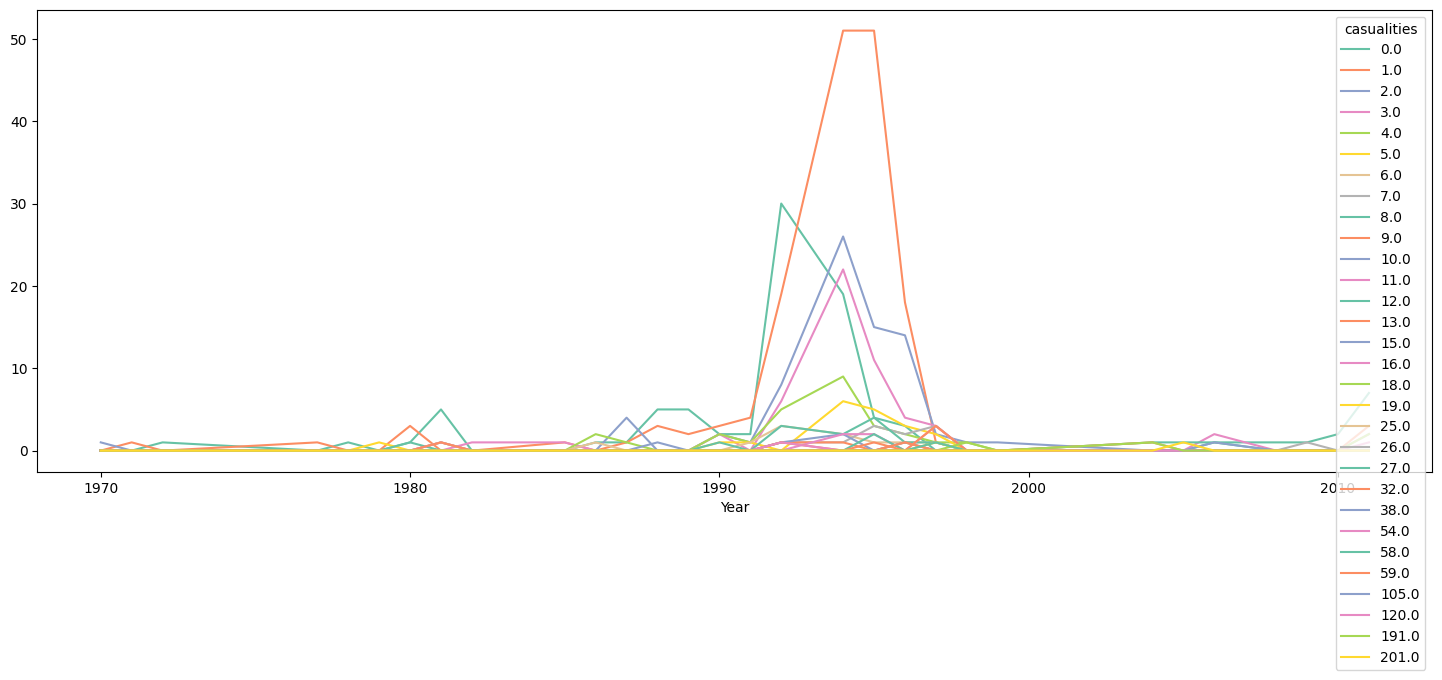

In [174]:
df_region=pd.crosstab(df[df['Country']=='Egypt'].Year,df[df['Country']=='Egypt'].casualities)
df_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()


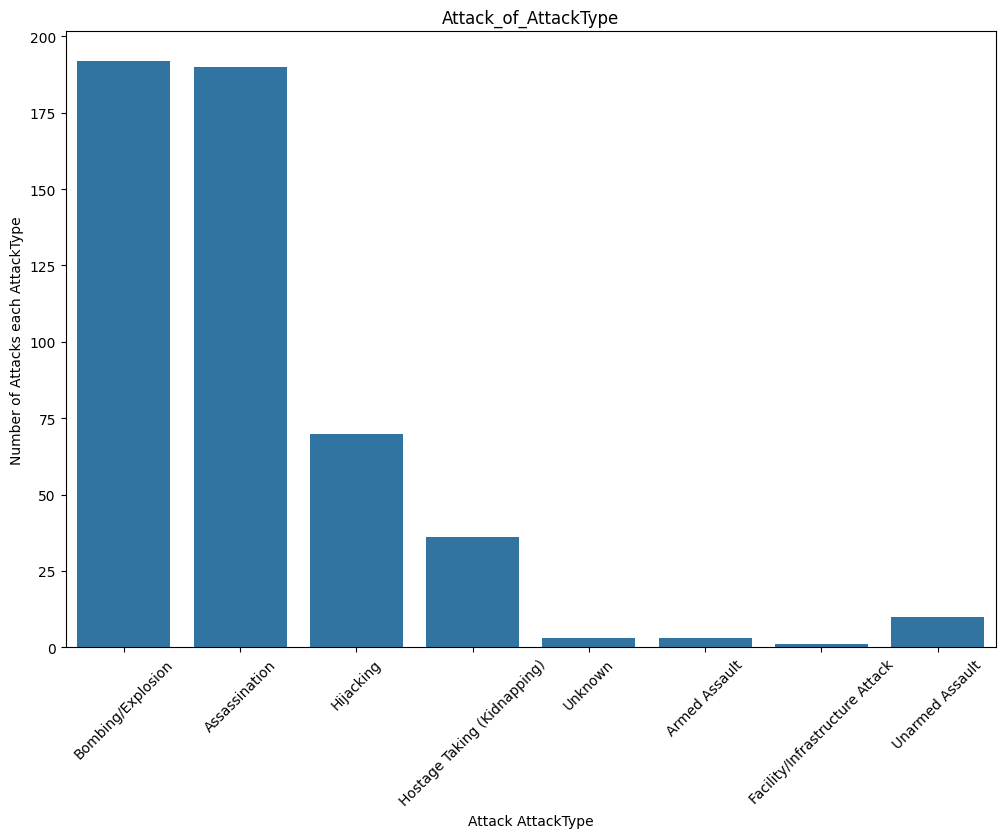

In [175]:
x_Weapon_type = df[df['Country']=='Egypt']['AttackType'].unique()
y_count_Weapon_type = df[df['Country']=='Egypt']['AttackType'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (12,8))
sns.barplot(x = x_Weapon_type,
           y = y_count_Weapon_type)
plt.xticks(rotation = 45)
plt.xlabel('Attack AttackType')
plt.ylabel('Number of Attacks each AttackType')
plt.title('Attack_of_AttackType')
plt.show()

In [176]:
df['state'].isnull().count()


104130

In [177]:
df.groupby("Country").count().sort_values('casualities',ascending=True).iloc[:15]['casualities']

Country
Falkland Islands       0
Andorra                0
Antigua and Barbuda    0
New Hebrides           1
North Korea            1
Wallis and Futuna      1
South Vietnam          1
Turkmenistan           1
International          1
Vatican City           1
St. Lucia              1
Mauritius              2
Dominica               2
Vanuatu                2
Equatorial Guinea      2
Name: casualities, dtype: int64

In [178]:
df.groupby("Country").count().sort_values('casualities',ascending=False).iloc[:5]['casualities']

Country
Iraq        7224
Colombia    6847
India       6650
Peru        5337
Pakistan    5204
Name: casualities, dtype: int64

In [179]:
df.groupby("state").count().sort_values('casualities',ascending=False).iloc[:5]['casualities']

state
Unknown             3309
Baghdad             3176
Lima                2349
Northern Ireland    2292
Antioquia           1705
Name: casualities, dtype: int64

In [180]:
print("Country with the most attacks:",df['Country'].value_counts().idxmax())
print("City with the most attacks:",df['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",df['Region'].value_counts().idxmax())
print("state with the most attacks:",df['state'].value_counts().idxmax())
print("Year with the most attacks:",df['Year'].value_counts().idxmax())
print("Month with the most attacks:",df['Month'].value_counts().idxmax())
print("Month with the most attacks:",df['Day'].value_counts().idxmax())
print("weapon type the most attacks:",df['Weapon_type'].value_counts().idxmax())
print("Group with the most attacks:",df['Group'].value_counts().index[1])
print("Most Attack Types:",df['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
state with the most attacks: Northern Ireland
Year with the most attacks: 1992
Month with the most attacks: 5
Month with the most attacks: 1
weapon type the most attacks: Explosives
Group with the most attacks: Shining Path (SL)
Most Attack Types: Bombing/Explosion


In [181]:
df['Year'].value_counts(dropna = False).sort_index()

Year
1970     651
1971     471
1972     568
1973     473
1974     581
1975     740
1976     923
1977    1319
1978    1526
1979    2662
1980    2662
1981    2586
1982    2544
1983    2870
1984    3495
1985    2915
1986    2860
1987    3183
1988    3721
1989    4324
1990    3887
1991    4683
1992    5071
1994    3456
1995    3081
1996    3058
1997    3197
1998     934
1999    1395
2000    1814
2001    1906
2002    1333
2003    1278
2004    1166
2005    2017
2006    2758
2007    3242
2008    4805
2009    4721
2010    4826
2011    4428
Name: count, dtype: int64

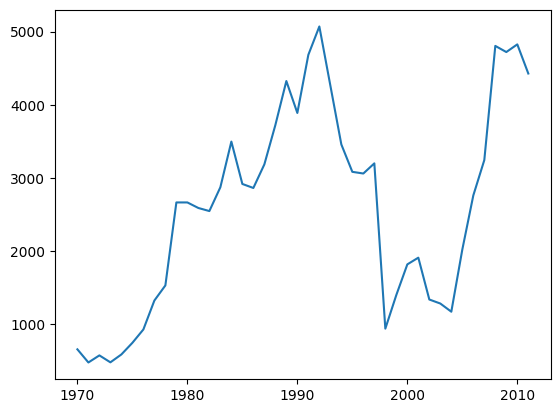

In [182]:
df_group = df.groupby('Year').agg({'Region': 'unique','city':'unique', 'AttackType': 'count'})
plt.plot(df_group['AttackType'])

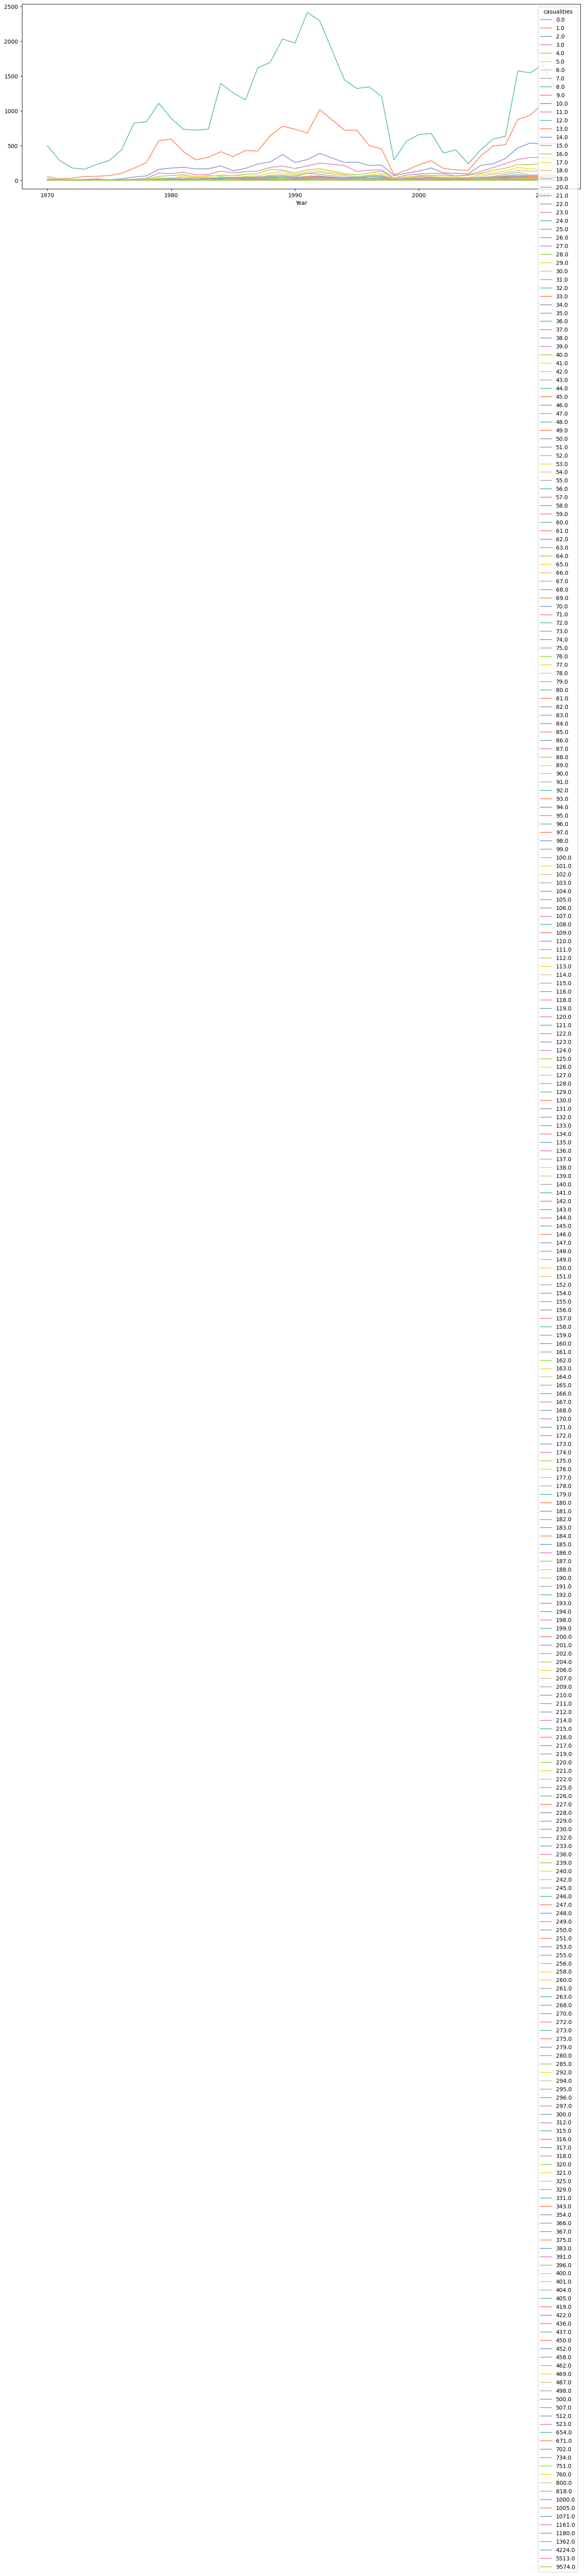

In [183]:
df_region=pd.crosstab(df.Year,df.casualities)
df_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

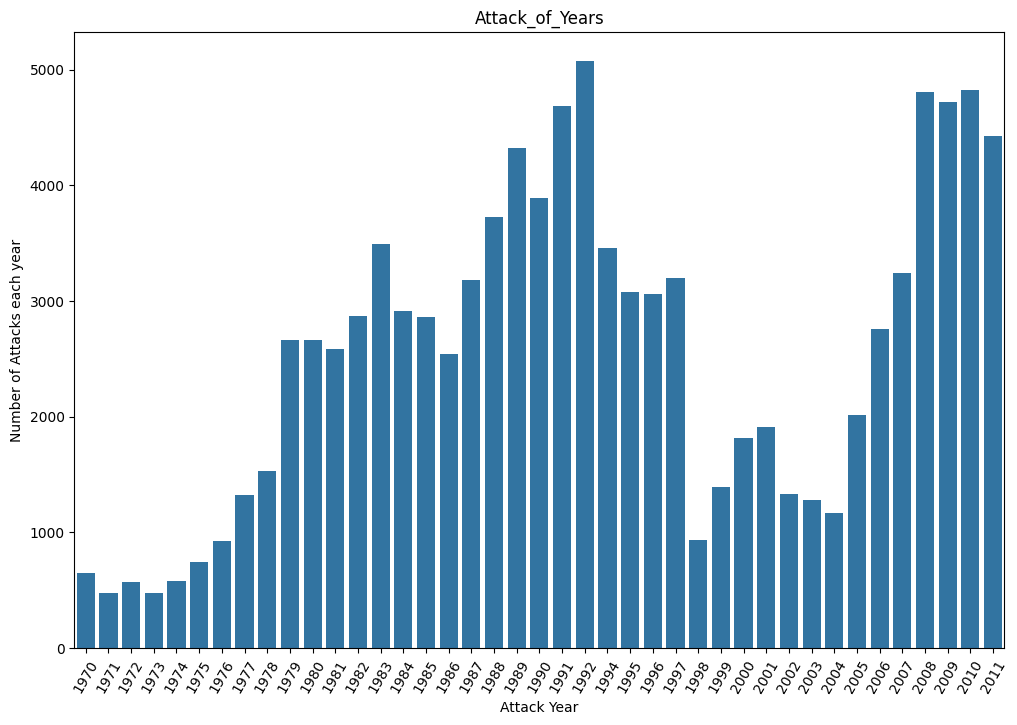

In [184]:
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (12,8))
sns.barplot(x = x_year,
           y = y_count_years)
plt.xticks(rotation = 60)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

In [185]:
df['Region'].value_counts(dropna = False).sort_index()

Region
Australasia & Oceania            236
Central America & Caribbean    10315
Central Asia                     500
East Asia                        697
Eastern Europe                  2905
Middle East & North Africa     20368
North America                   3113
South America                  17860
South Asia                     19673
Southeast Asia                  6420
Sub-Saharan Africa              6979
Western Europe                 15064
Name: count, dtype: int64

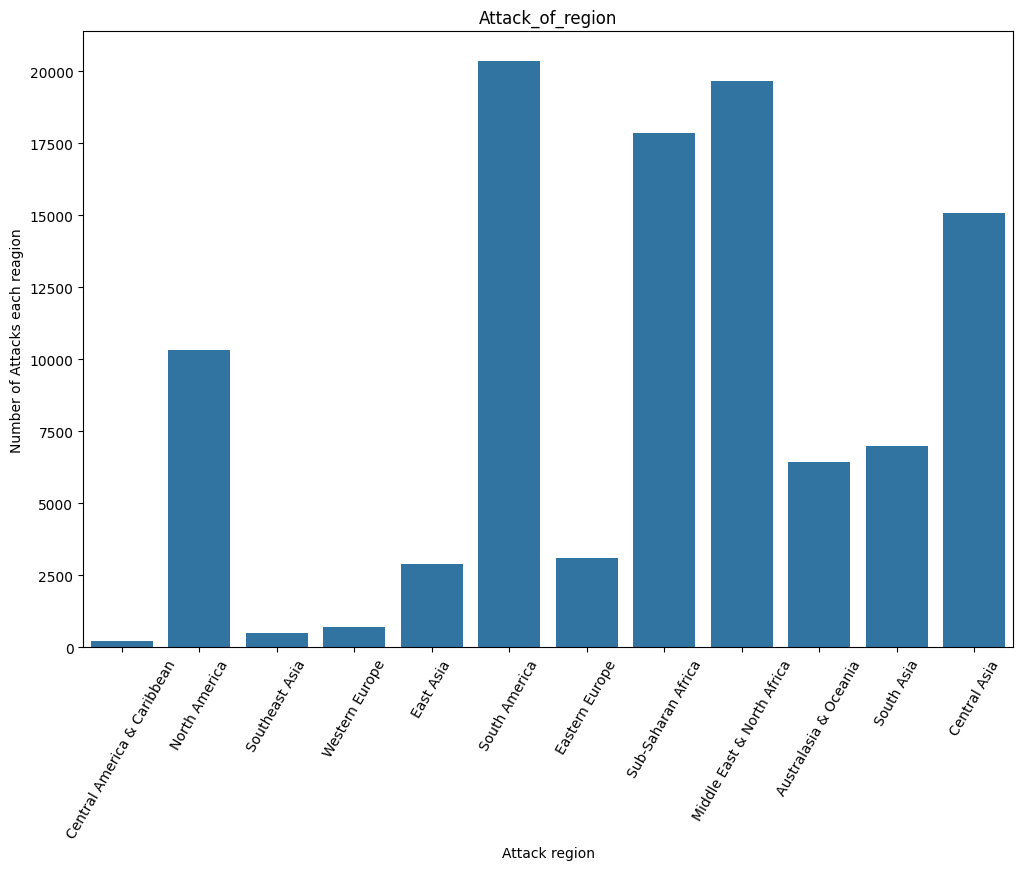

In [186]:
x_region = df['Region'].unique()
y_count_region = df['Region'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (12,8))
sns.barplot(x = x_region,
           y = y_count_region)
plt.xticks(rotation = 60)
plt.xlabel('Attack region')
plt.ylabel('Number of Attacks each reagion')
plt.title('Attack_of_region')
plt.show()

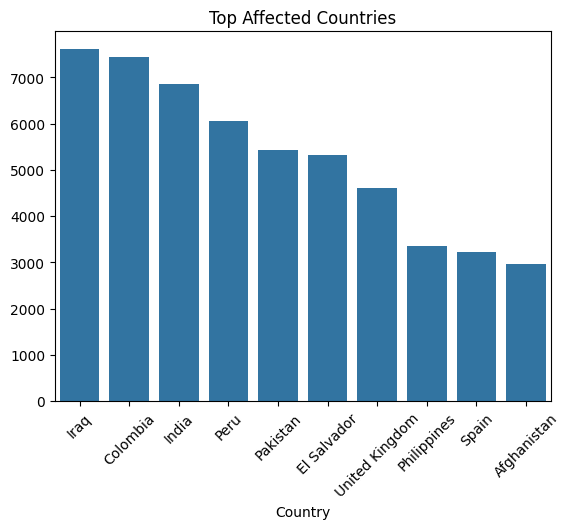

In [187]:
sns.barplot(x=df['Country'].value_counts()[:10].index,y=df['Country'].value_counts()[:10].values)
plt.xticks(rotation = 45)
plt.title('Top Affected Countries')
plt.show()

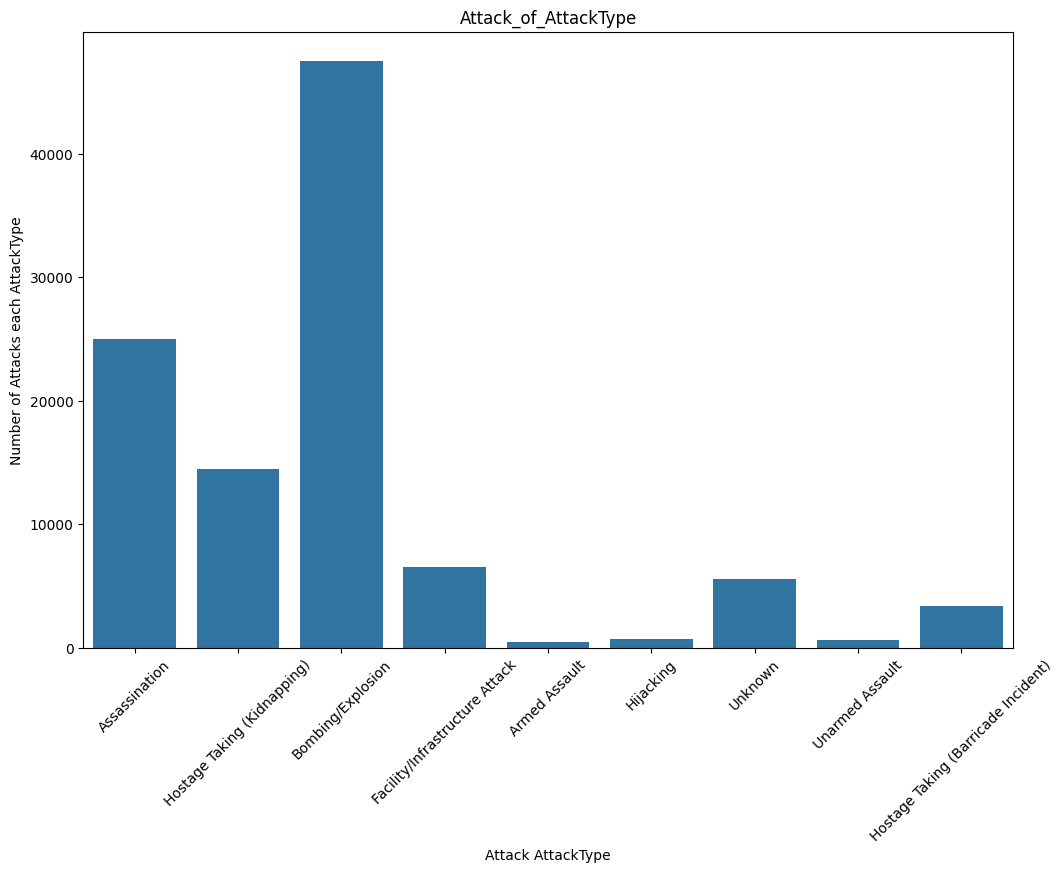

In [188]:
x_Weapon_type = df['AttackType'].unique()
y_count_Weapon_type = df['AttackType'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (12,8))
sns.barplot(x = x_Weapon_type,
           y = y_count_Weapon_type)
plt.xticks(rotation = 45)
plt.xlabel('Attack AttackType')
plt.ylabel('Number of Attacks each AttackType')
plt.title('Attack_of_AttackType')
plt.show()

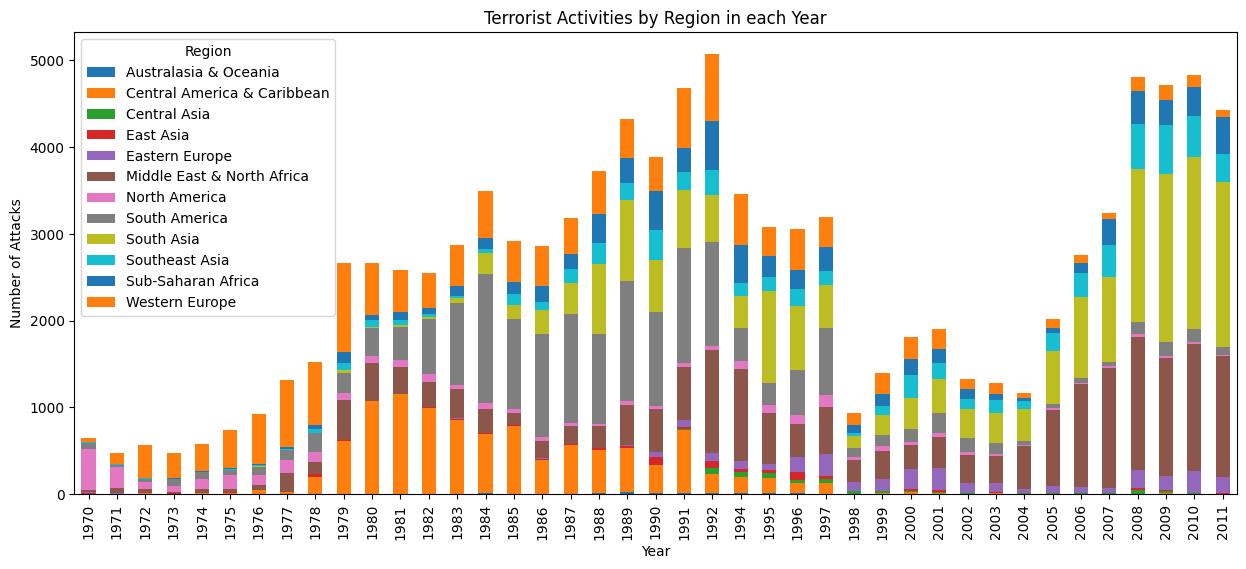

In [189]:
pd.crosstab(df.Year, df.Region).plot(kind='bar',stacked=True,figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

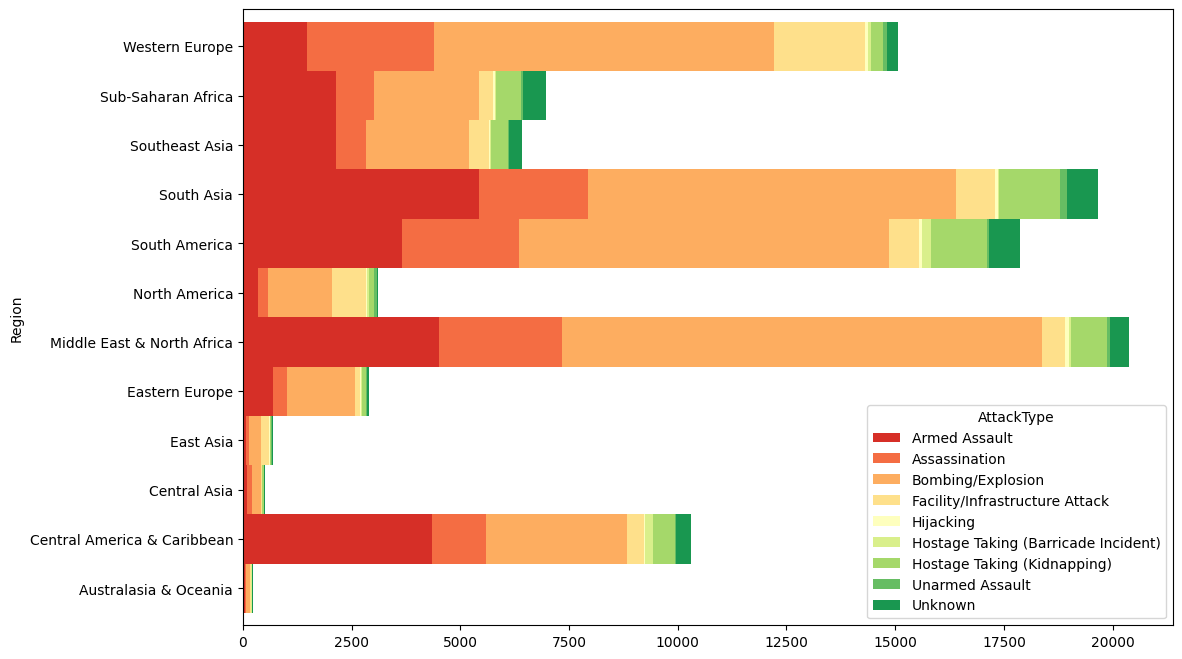

In [190]:
pd.crosstab(df.Region,df.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

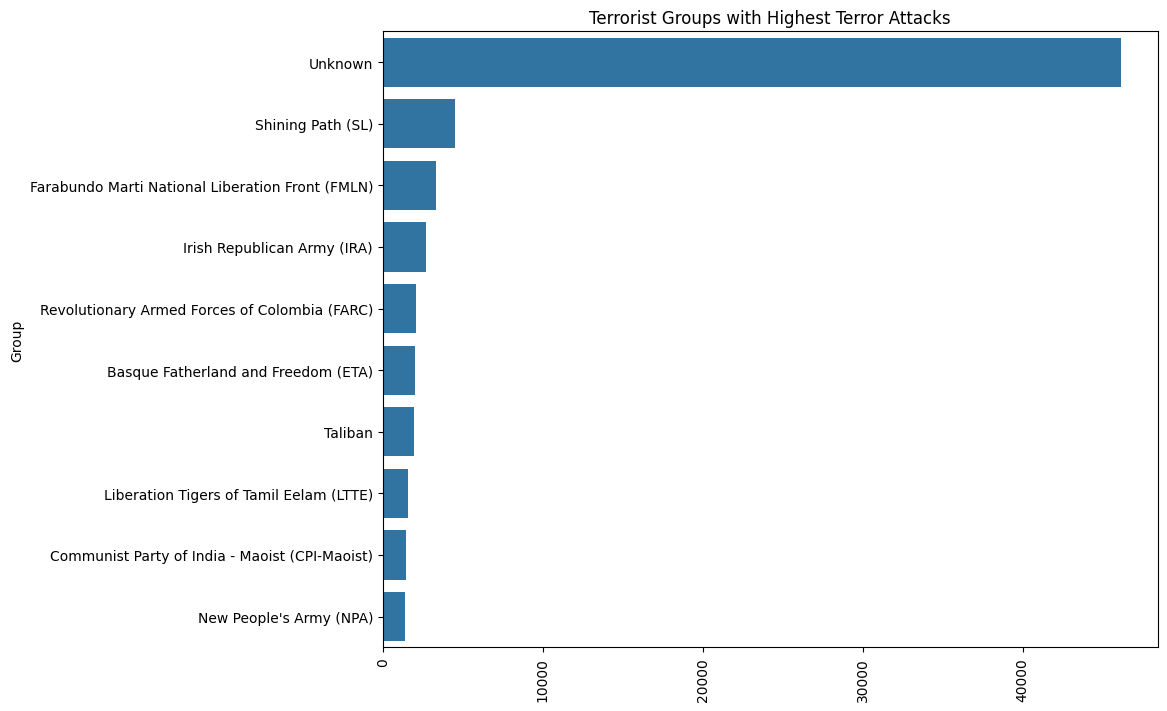

In [202]:
sns.barplot(x=df['Group'].value_counts()[:10].values,y=df['Group'].value_counts()[:10].index)
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

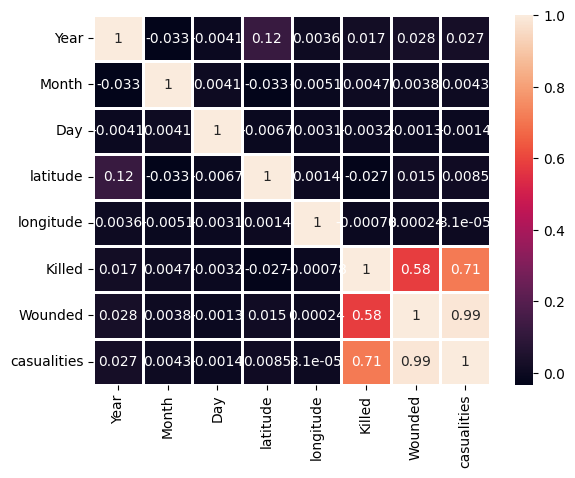

In [209]:
numeric_data = df.select_dtypes(include=[float, int])
corr_matrix = numeric_data.corr()

sns.heatmap(corr_matrix,annot=True, linewidth=2)
plt.show()

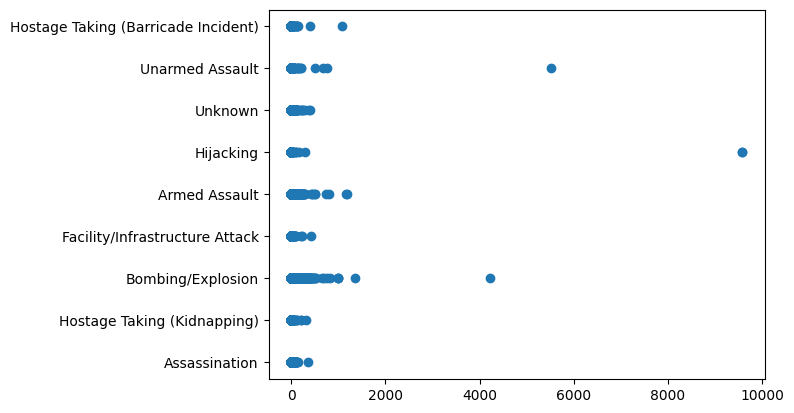

In [214]:
plt.scatter(data=df, x='casualities', y='AttackType')
plt.show()


In [197]:
spread_overyears = df.groupby(df['Region'])['Year'].mean().reset_index()
fig = px.line(spread_overyears, x='Region', y='Year', title=' spread Over years')
fig.show()

In [196]:
attacks_by_country = df.groupby('Country')['casualities'].count()#.agg({'attacktype1_txt':'count'})
group_by_df = pd.DataFrame({'Country': attacks_by_country.index, 'casualities': attacks_by_country.values})
fig = px.choropleth(group_by_df,
                    locations='Country',
                    locationmode='country names',
                    color_continuous_scale="turbid",
                    color='casualities',
                    hover_name='Country',
                    projection='equirectangular')

fig.show()

In [199]:
# Pandas operation
start_time_pandas = time.time()

grouped_pandas = df.groupby(['Year', 'Region'])['Killed'].sum().reset_index()

time_pandas = time.time() - start_time_pandas

# Dask operation
start_time_dask = time.time()

grouped_dask = ddf.groupby(['iyear', 'region_txt'])['nkill'].sum().reset_index()
grouped_dask = grouped_dask.compute()

time_dask = time.time() - start_time_dask

print("\nBenchmarking Results:")
print(f"Pandas Execution Time: {time_pandas} seconds")
print(f"Dask Execution Time: {time_dask} seconds")


Benchmarking Results:
Pandas Execution Time: 0.01820540428161621 seconds
Dask Execution Time: 0.6576118469238281 seconds


In [200]:
df.to_csv('data.csv', index=False)